# Graphics and Visualisation

I recommend you follow along by typing the code snippets into your own file.

We will make use of the pylab part of the matplotlib package. The [matplotlib](http://matplotlib.org) library is a powerful tool capable of producing complex publication-quality figures with fine layout control in two and three dimensions; in this session we will provide a minimal self-contained introduction to its usage that covers the basic functionality.  I encourage you to read the tutorials included with the matplotlib documentation as well as to browse its extensive gallery of examples that include source code.

We will use the shorthand `plt` for the `matplotlib.pyplot` module where the easy-to-use plotting functions reside. Similarly we'll use `np` as shorthand for `numpy`.

### Lab Session Contents: ###

1. Simple 1D graphs
2. 2D graphs and images
3. 3D graphs
4. Animations

There are more examples of all of these in Chapter 3 of Newman's Python for Physicists book. 

For more on `matplotlib`, including tutorials visit [matplotlib.org](http://matplotlib.org). 

Specific `matplotlib` pages which you may find the most useful: 
+ http://matplotlib.org/1.5.1/api/pyplot_summary.html - summary of plotting commands
+ http://matplotlib.org/users/customizing.html - how to customize style files
+ http://matplotlib.org/gallery.html - gallery of example plots (warning - make sure you are in the right version of `matplotlib`)
+ http://matplotlib.org/examples/color/colormaps_reference.html - colour maps


In [1]:
%matplotlib inline

## Graphs

A basic plot is simple. You need to import the plotting packages, define an array to plot, plot it and then show it (try it with and without the `show()` to see the difference). 

The x-array below is just the index numbers of the y-array. 

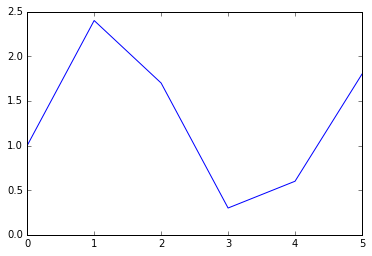

In [2]:
from pylab import plot,show
y = [ 1.0, 2.4, 1.7, 0.3, 0.6, 1.8 ]
plot(y)
show()

Another way of importing the packages is demoed below: 

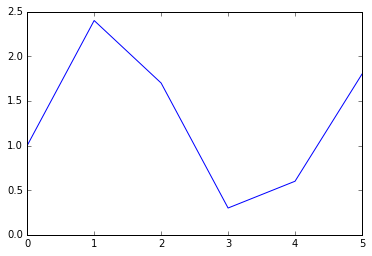

In [3]:
import matplotlib.pyplot as plt

plt.plot(y)
plt.show()

For a more complicated plot, we will make an x-array (making use of the `linspace` command from `numpy`), calculate it's sine and cosine and plot both on the same plot. 

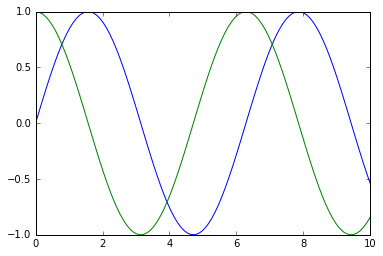

In [5]:
import matplotlib.pyplot as plt
from numpy import linspace,sin,cos

x = linspace(0,10,100)
y = sin(x)
z = cos(x)
plt.plot(x,y)
plt.plot(x,z)
plt.show()

You should never include a plot like this in a report. What's wrong with it? 

### Adding Axis Labels, Titles, Legends ###

Axis labels use of `xlabel` and `ylabel` as follows: 

If you want a plot title, use `plt.title`. 

For a legend, label the different lines in plot, and then use `plt.legend`. 

The labels accept LaTeX formatting for maths. We will cover LaTeX in the next lab session. 

You might want a grid, which can be added using `plt.grid()`. 

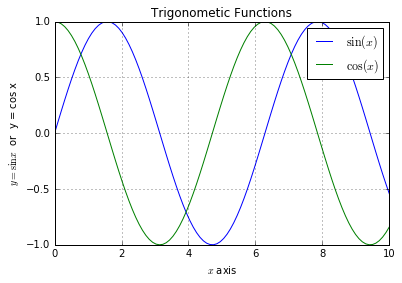

In [6]:
#Trend labels
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, z, label=r'$\cos(x)$')

#Title
plt.title('Trigonometic Functions')

#Axis labels
plt.xlabel("$x$ axis")
plt.ylabel("$y = \sin x$  or  y = cos x")

#Add a grid
plt.grid()

#Add a legend box
plt.legend()

#Actually show the plot
show()

If you want to improve the layout further you might want a little white space above and below the curves. Do this with `ylim`.

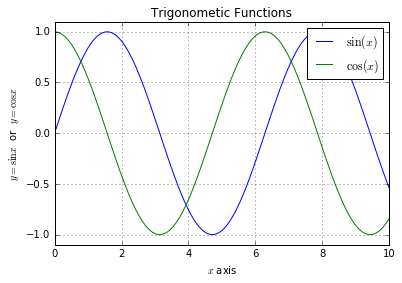

In [7]:
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, z, label=r'$\cos(x)$')

#Adding white space defining the range of the plot
plt.ylim(-1.1,1.1)

plt.title('Trigonometic Functions')
plt.xlabel("$x$ axis")
plt.ylabel("$y = \sin x$  or  $y = \cos x$")
plt.grid()
plt.legend()
show()

### Line Formatting ###

You might want the lines to be different colours from the default. Do this by adding a formating string to the `plot` command. 

It will have this form: 

`plot(x,y,"CS")`

where `C` is a character which tells the colour. Here are some common options: 

* `r` = red
* `g` = green
* `b` = blue
* `c` = cyan
* `m` = magenta
* `y` = yellow
* `k` = black
* `w` = white

`S` will be a string defining the line style. For example: 

* `-` = solid line
* `--` = dashed line
* `o` = circular points
* `s` = square points
* `.` = small dots


+ http://matplotlib.org/1.5.1/api/pyplot_summary.html - summary of plotting commands
+ http://matplotlib.org/examples/color/colormaps_reference.html - colour maps/choices

For example: 

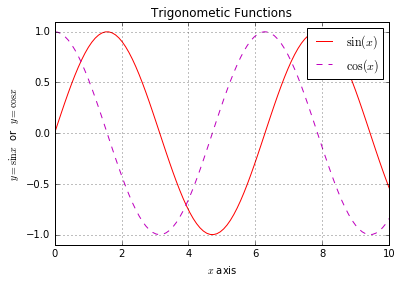

In [8]:
#Tell it what to plot, what colour and linestyle and label them
plt.plot(x, y, 'r-', label=r'$\sin(x)$')
plt.plot(x, z, 'm--', label=r'$\cos(x)$')

#Plot range
plt.ylim(-1.1,1.1)

#Plot title and axis labels, grid and legend
plt.title('Trigonometic Functions')
plt.xlabel("$x$ axis")
plt.ylabel("$y = \sin x$  or  $y = \cos x$")
plt.grid()
plt.legend()

#Show the plot
show()

Hopefully this gives you a sense of the possible formatting options. 

There are many more options than we can go through in lab. 

Visit [matplotlib.org](http://matplotlib.org) for the full documentation.

Other places to find example plots: 
 * [StackOverflow](http://stackoverflow.com/questions/tagged/python) (this is the python subsection)
 * [Github](https://github.com) - and search for what you want to do, someone may have done it already. 

### Plotting Data from a File ###

In python is is very easy to load files of data and plot them. The `numpy` package has modules which can read different file formats. Make a simple text file with two columns of data. E.g.

`0 12121.71
1 12136.44
2 12226.73
3 12221.93
4 12194.13
5 12283.85
6 12331.6
7 12309.25`

Call this file `values.txt`, and make sure it's in the same directory as your code. 

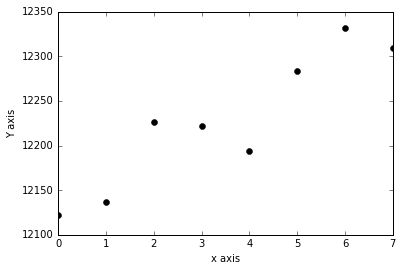

In [10]:
import numpy as np

#Use the numpy package loadtxt to inport data from a file
data = np.loadtxt("values.txt",float)

#Tell python which bit is x and which bit is y
x = data[:,0]
y = data[:,1]

#Plot these data
plt.plot(x,y,'ko')
plt.xlabel("x axis")
plt.ylabel("Y axis")
show()

### Adding Error Bars ###

In many experimental applications you will need to plot error bars on your points. We can do this using the syntax 

`plt.errorbar(x,y,xerr=A,yerr=B)`

For example for a fixed size error bar: 

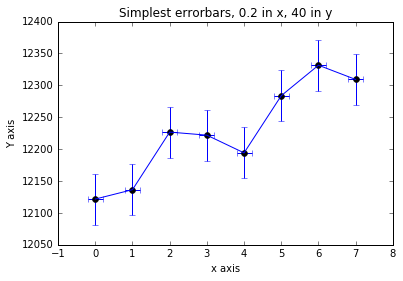

In [11]:
data = np.loadtxt("values.txt",float)
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'ko')

#Add error bars
plt.errorbar(x, y, xerr=0.2, yerr=40)

plt.title("Simplest errorbars, 0.2 in x, 40 in y");
plt.xlabel("x axis")
plt.ylabel("Y axis")
plt.show()

It is also possible to add variable error bars as follows. 

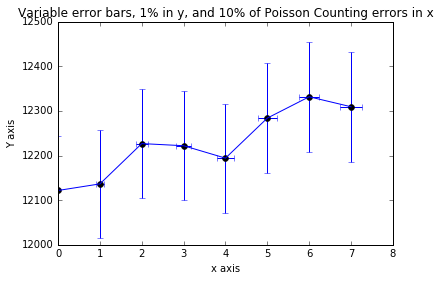

In [12]:
# example variable error bar values
yerr = 0.01*y
xerr = 0.1*np.sqrt(x)

data = np.loadtxt("values.txt",float)
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'ko')
plt.errorbar(x, y, xerr=xerr, yerr=yerr)
plt.title("Variable error bars, 1% in y, and 10% of Poisson Counting errors in x");
plt.xlabel("x axis")
plt.ylabel("Y axis")
plt.show()

## In Class Exercise ##

We will now practice these plotting skills by making various plots from data in the file  `sunspots.txt` (on Moodle). This file contains sunspot number each month since January 1749. You will need to convert the x values into a more useful number than months since Jan 1749. 


1. First plot the number of sunspots as a function of time, expressed in years. Make sure it is properly labelled, use `ylim` to customize the axes range, and make your own selection of line colour and style. 

2. Now plot only the data in the last 20 years of the file (1991-2011). 

3. Now copy the above plot and add Poisson counting error bars to the y-values. (Poisson counting error bars are simply +/-sqrt N).  

4. Now copy the above and overplot a sine wave. Adjust it to make a good visual match with the data. You will need to adjust the amplitude, x and y axis zero points and period to match. E.g. 

` y = A + B*sin(C/pi(x-D))`

[where A = where the zero line should be, B = amplitude around A, C = the period of the oscillation in years, and D = the zero point in years]. Hint the period of the solar cycle is about 11 years. 

### Other Types of Plots (Histograms and log spacing) 

First a histogram. 

This example also demos a different way to set axis ranges (using `plt.axis`), and how to write text on the plot. 

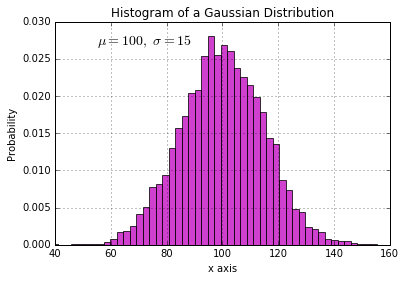

In [13]:
#Let's generate a Gaussian with mean 100, standard deviation 15 using the random function
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='m', alpha=0.75)

#alpha is a parameter which sets the saturation of the colour
#normed normalises the area to 1.  

plt.xlabel('x axis')
plt.ylabel('Probability')
plt.title('Histogram of a Gaussian Distribution')

# This will put a text fragment at the position given:
plt.text(55, .027, r'$\mu=100,\ \sigma=15$', fontsize=14)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

Finally a log plot. These are frequently used in astronomy where the dynamic range of a plot can be very large. Let's plot first on a normal linear scale.  

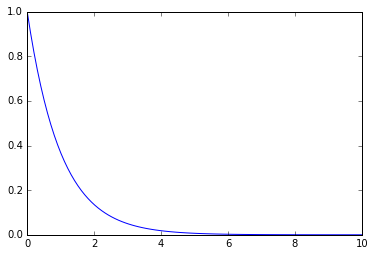

In [14]:
x = np.linspace(0, 10, 100)
y = np.exp(-x)
plt.plot(x, y);

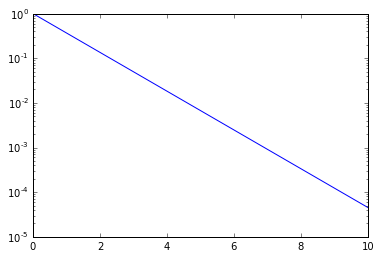

In [15]:
plt.semilogy(x, y);

# Customising your Plots #

Problems with plots in papers/reports (not just students, academics do a lot of these too): 

+ font size is small
+ font type is ugly
+ tick size is small
+ lines are too thin
+ colours unsuitable for people who are colour blind
+ legend formatting is ugly
+ ... 

(you can read entire books on this stuff, but this is a Physics unit so I'll stop there). 

The easiest way to make consistent plots is to define a new `matplotlib` style in its own `.py` file and import it every time you want to plot some data.  For an example style file see `mpl_style.py` (Credit: Coleman Krawcyzk) that increases line widths, increases fonts sizes, uses a better color cycle, formats ticks and axes larger, and sets to default colormap to something reasonable (`magma`, `plasma`, `inferno`, and `viridis` are all color blind friendly and convert to black and white without issue).

+ http://matplotlib.org/users/customizing.html - how to customize style files

In [16]:
import mpl_style
plt.style.use(mpl_style.style1)

Let's try the histogram again: 

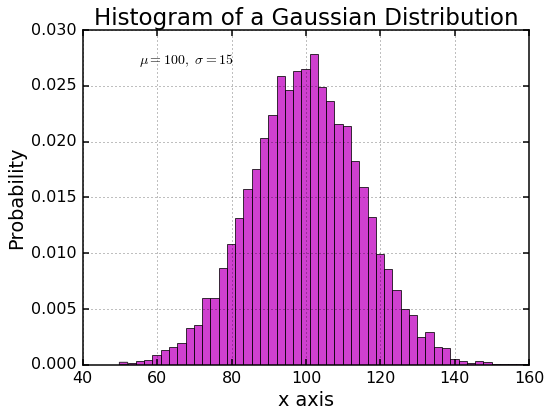

In [17]:
#Let's generate a Gaussian with mean 100, standard deviation 15 using the random function
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='m', alpha=0.75)

#alpha is a parameter which sets the saturation of the colour
#normed normalises the area to 1.  

plt.xlabel('x axis')
plt.ylabel('Probability')
plt.title('Histogram of a Gaussian Distribution')

# This will put a text fragment at the position given:
plt.text(55, .027, r'$\mu=100,\ \sigma=15$', fontsize=14)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

## In Class Exercise

Make a histogram of the sunspot number on the Sun from the file. 

Make sure to customize the graphics using the style file. 

## 2D Plots

There are many applications where plotting a 2D array will be useful. 

A basic 2D plot is very easy. It makes use of the `matplotlib` module, `imshow`.

`cmap` defines the colour map. Here are some options: 

 * Default (ie. if nothing specified): red-blue heat map (`jet`)
 * `Blues` (note `Blues_r` or the equivalent will reserve the default direction) 
 * `Greys` - greyscale
 * `hot` - heat map that goes black-red-yellow-white
 * `spectral` - spectrum with 7 clearly defined colors, plus black and white
 * `bone` - alternative gray-scale with a hint of blue
 * `hsv` - rainbow scheme that starts and ends with red
 * `magma` - white to black via reds/yellows (like hot magma)
 * `plasma` - white to blue/purple via yellow
 * `inferno` - very similar to `magma`
 * `viridis` - yellow to blue via green
 
Try the below plots out with various colourmaps. 

+ http://matplotlib.org/examples/color/colormaps_reference.html - colour maps/choices

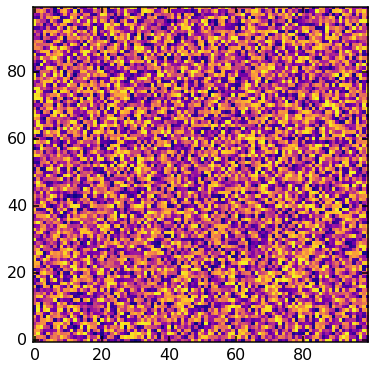

In [19]:
plt.imshow(np.random.rand(100,100), interpolation='nearest',cmap='plasma');

The 2D array can be read in from a file of course. For example, making use of the default colourmap (need to grab the file `circular.txt` for this to work). 

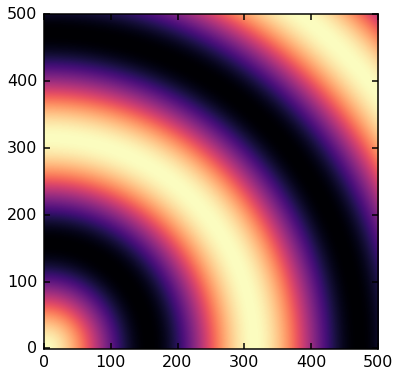

In [20]:
data = np.loadtxt("circular.txt",float)
plt.imshow(data,origin="lower",cmap='magma')

If you use a colour scale to indicate a physical quantity you will want to include a colourbar. This is easy using `colorbar()`

There is an art to selecting the right colour map to display data/visualisations. You may also wish to consider how plots look printed by a B&W printer, or viewed by people with common types of colour blindness.  

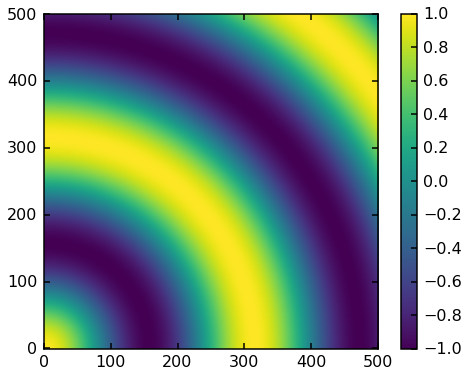

In [21]:
plt.imshow(data,origin="lower",cmap='viridis')
plt.colorbar()

## Images

Python makes it easy to include images in your plots, and even manipulate them. You can use the Soyuz_launch.png images provided on Moodle or any appropriate image (.png) of your choice. 

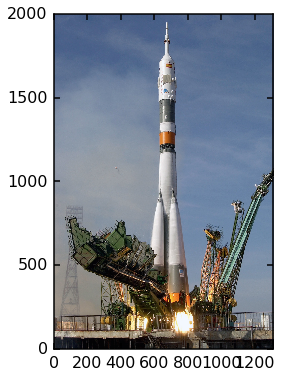

In [23]:
img = plt.imread('Soyuz_launch.png')
plt.imshow(img)
plt.show()

We can also explore just single layers of this image, which is constructed from a digital camera from RBG (Red,Blue,Green in that order) filters in the digital camera. For example: 

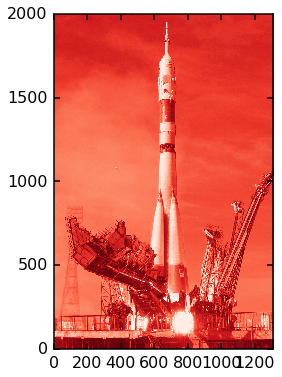

In [28]:
#Red image
plt.imshow(img[:,:,0], cmap="Reds_r")
plt.show()

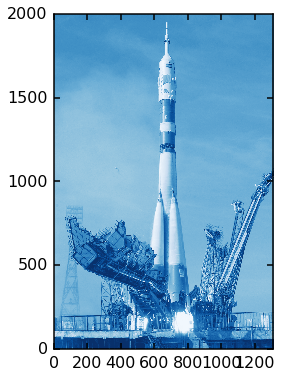

In [29]:
#Blue image
plt.imshow(img[:,:,1], cmap="Blues_r")
plt.show()

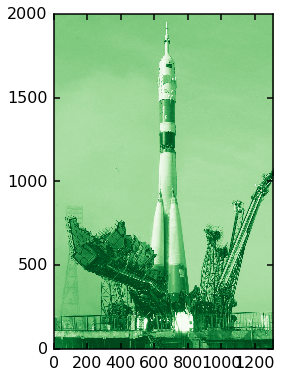

In [30]:
#Green image
plt.imshow(img[:,:,2], cmap="Greens_r")
plt.show()

### Subplots

It takes a lot of space to make all those plots separately, but we can make subplots as follows. 

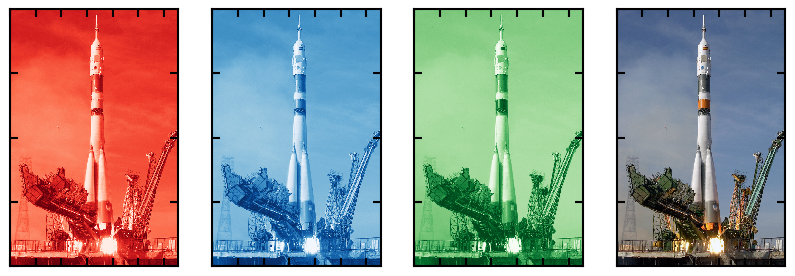

In [43]:
fig, ax = plt.subplots(1,4, figsize=(10,6))
ax[0].imshow(img[:,:,0], cmap="Reds_r")
ax[1].imshow(img[:,:,1], cmap="Blues_r")
ax[2].imshow(img[:,:,2], cmap="Greens_r")
ax[3].imshow(img);
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
plt.show()

(array([     0.,      0.,      0.,  19676.,   9220.,   4785.,   9664.,
          5085.,   4993.,   4834.,   4935.,   4818.,   4816.,   4605.,
          4486.,   4435.,   4276.,   4389.,   4281.,   4521.,   4537.,
          4567.,   4656.,   4825.,   4784.,   5028.,   4976.,   5028.,
          4960.,   5044.,   4915.,   4832.,   4637.,   4474.,   4444.,
          4620.,   4469.,   4411.,   4365.,   4230.,   4061.,   4076.,
          3967.,   3830.,   3827.,   3739.,   3715.,   3749.,   3581.,
          3781.,   3899.,   3905.,   4182.,   4204.,   4427.,   4622.,
          4725.,   4600.,   4688.,   4588.,   4479.,   4236.,   4329.,
          4298.,   4390.,   4614.,   4668.,   5016.,   5513.,   6406.,
          8118.,  11216.,  16270.,  19559.,  23425.,  28308.,  29498.,
         31641.,  30166.,  28642.,  28625.,  28197.,  26768.,  26460.,
         26656.,  28608.,  28353.,  28281.,  27726.,  24934.,  22339.,
         21031.,  22645.,  25197.,  29176.,  33670.,  34549.,  32983.,
      

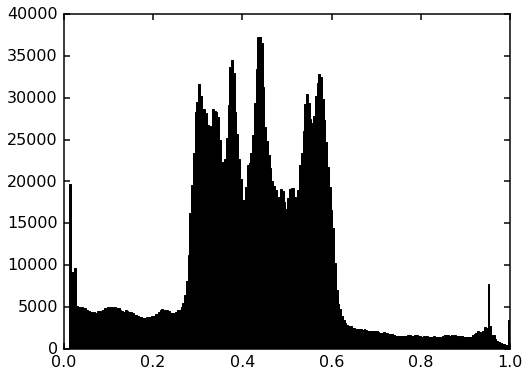

In [35]:
redimg=img[:,:,0]
plt.hist(redimg.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

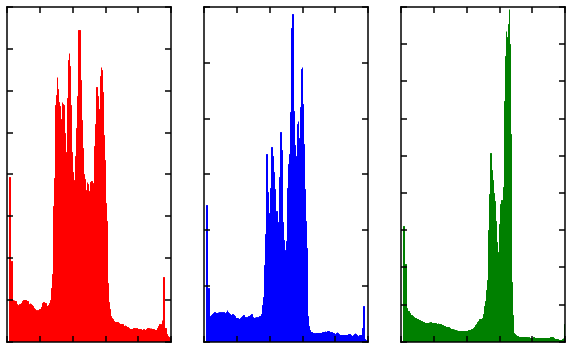

In [38]:
#Give red, blue and green different names
redimg=img[:,:,0]
blueimg=img[:,:,1]
greenimg=img[:,:,2]

#Make an array of plots of the histograms of their pixel values
fig, ax = plt.subplots(1,3, figsize=(10,6))
ax[0].hist(redimg.ravel(), bins=256, range=(0.0, 1.0), fc='r', ec='r')
ax[1].hist(blueimg.ravel(), bins=256, range=(0.0, 1.0), fc='b', ec='b')
ax[2].hist(greenimg.ravel(), bins=256, range=(0.0, 1.0), fc='g', ec='g')

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
plt.show()

## In Class Exercise ##

### 2D Plotting of the Surface of Silicon 

There is a file in the Github repository called stm.txt, which contains a grid of values from scanning tunneling microscope measurements of the (111) surface of silicon. 

A scanning tunneling microscope (STM) is a device that measures the shape of a surface at the atomic level by tracking a sharp tip over the surface and measuring quantum tunneling current as a function of position. The end result is a grid of values that represent the height of the surface and the file stm.txt contains just such a grid of values. 

Write a program that reads the data contained in the file and makes
1. A histogram of the values
2. A density plot of the values. 

Use the various options and variants you have learned about to make a picture that shows the structure of the silicon surface clearly (This is Exercise 3.3 from Newman).

# 3D Plotting and Animations

Matplotlib has many options and function.

We will just run through a simple 3D plot, and a simple animation so you can get a sense of the possibilities, there is a lot more that you could do, and I am not an expert in this at all, so I will just point you to the Matplotlib tutorials to go further. 

+ http://matplotlib.org/gallery.html - gallery of example plots (warning - make sure you are in the right version of `matplotlib`)

+ For more 3D plotting: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
+ For more on animations: http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/


### 3D Plotting

For the most basic 3D plot: 

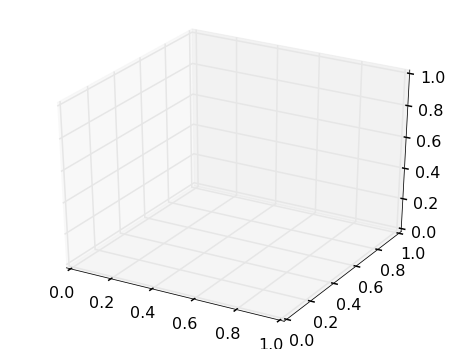

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

The below code is an example plot of a function in 3D taken from 
+ http://matplotlib.org/gallery.html - gallery of example plots

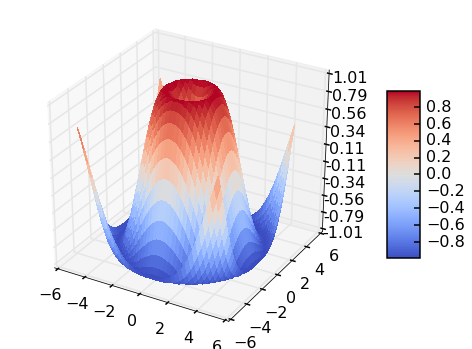

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Animation

In Newman, both 3D graphics and animations make use of the `visual` package, however this does not appear to be installed as standard in Anaconda. 

`Matplotlib` also has animation packages. 

Animation is a place where Notebooks are not yet fully integrated, so we'll go through this in the terminal. 

Animation is also more system dependent - don't forget the "Google the error message" method of debugging. 

(e.g. I have to set blit=False in the animation keywords on a Mac, it should work with either on Windows/Linux but may be faster with blit=True). 